In [1]:
from generate_samples import SyntheticDAG
from oracle import *
from causal_peeler import *
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
from tabulate import tabulate

/Users/ryanwelch/opt/anaconda3/envs/causal/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def sample_full_rank_matrix(n=3, lower=-10, upper=10):
    while True:
        matrix = torch.FloatTensor(n, n).uniform_(lower, upper)
        matrix.requires_grad_(True)
        matrix.retain_grad()
        if torch.det(matrix).item() != 0:
            return matrix

# Line Graph

In [4]:
DAG_type = 'line'
num_latent = 4
num_samples = 1000
variance_max = 1
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat

In [5]:
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type, variance_max)

there are no undirected edges
plotting...


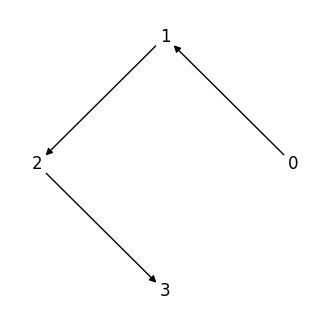

In [6]:
graph.draw_graph()

In [9]:
U,X = graph.get_obs_samples(G, num_samples, rescale=True)

In [8]:
# X = (G@U.T).T
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...


AttributeError: 'SyntheticDAG' object has no attribute 'variances'

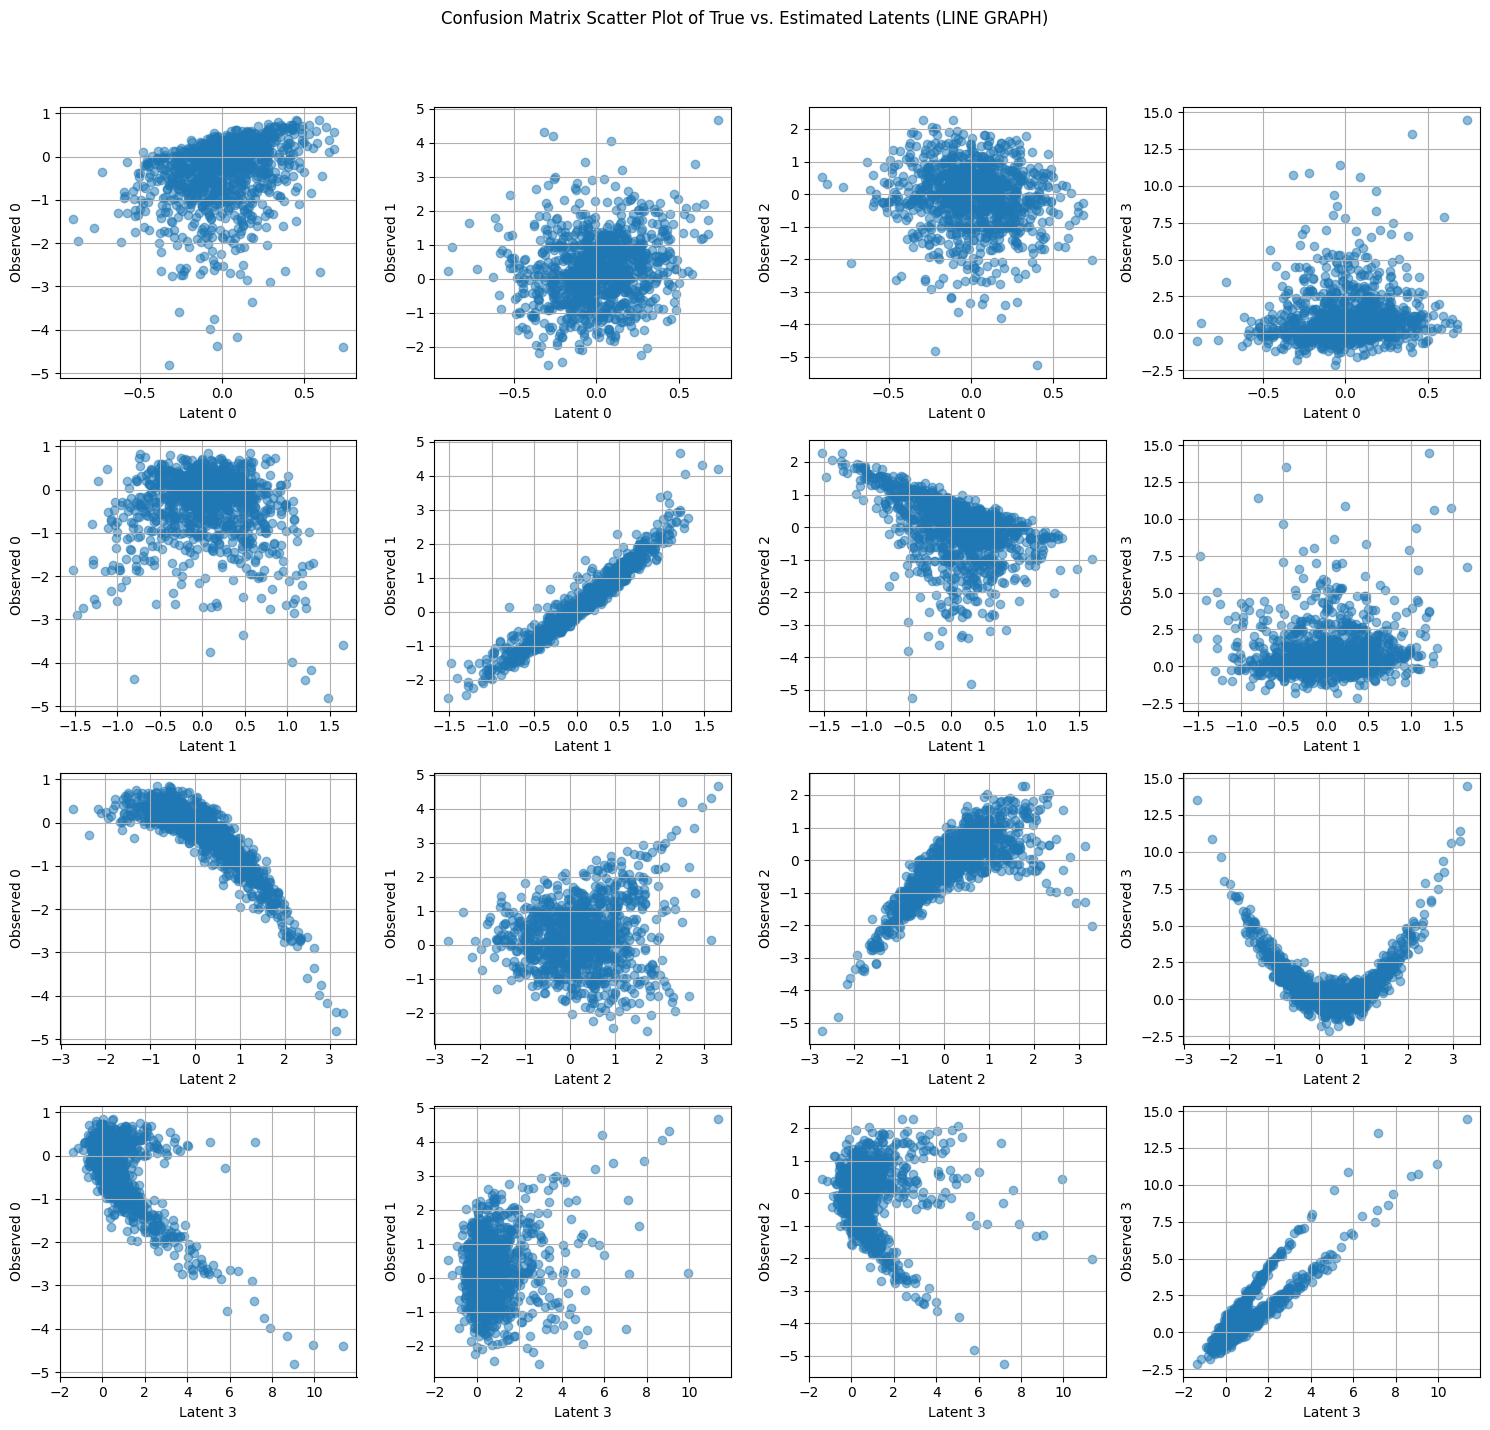

In [8]:
U_np = U.detach().numpy()
X_np = X.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (LINE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], X_np[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Observed {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

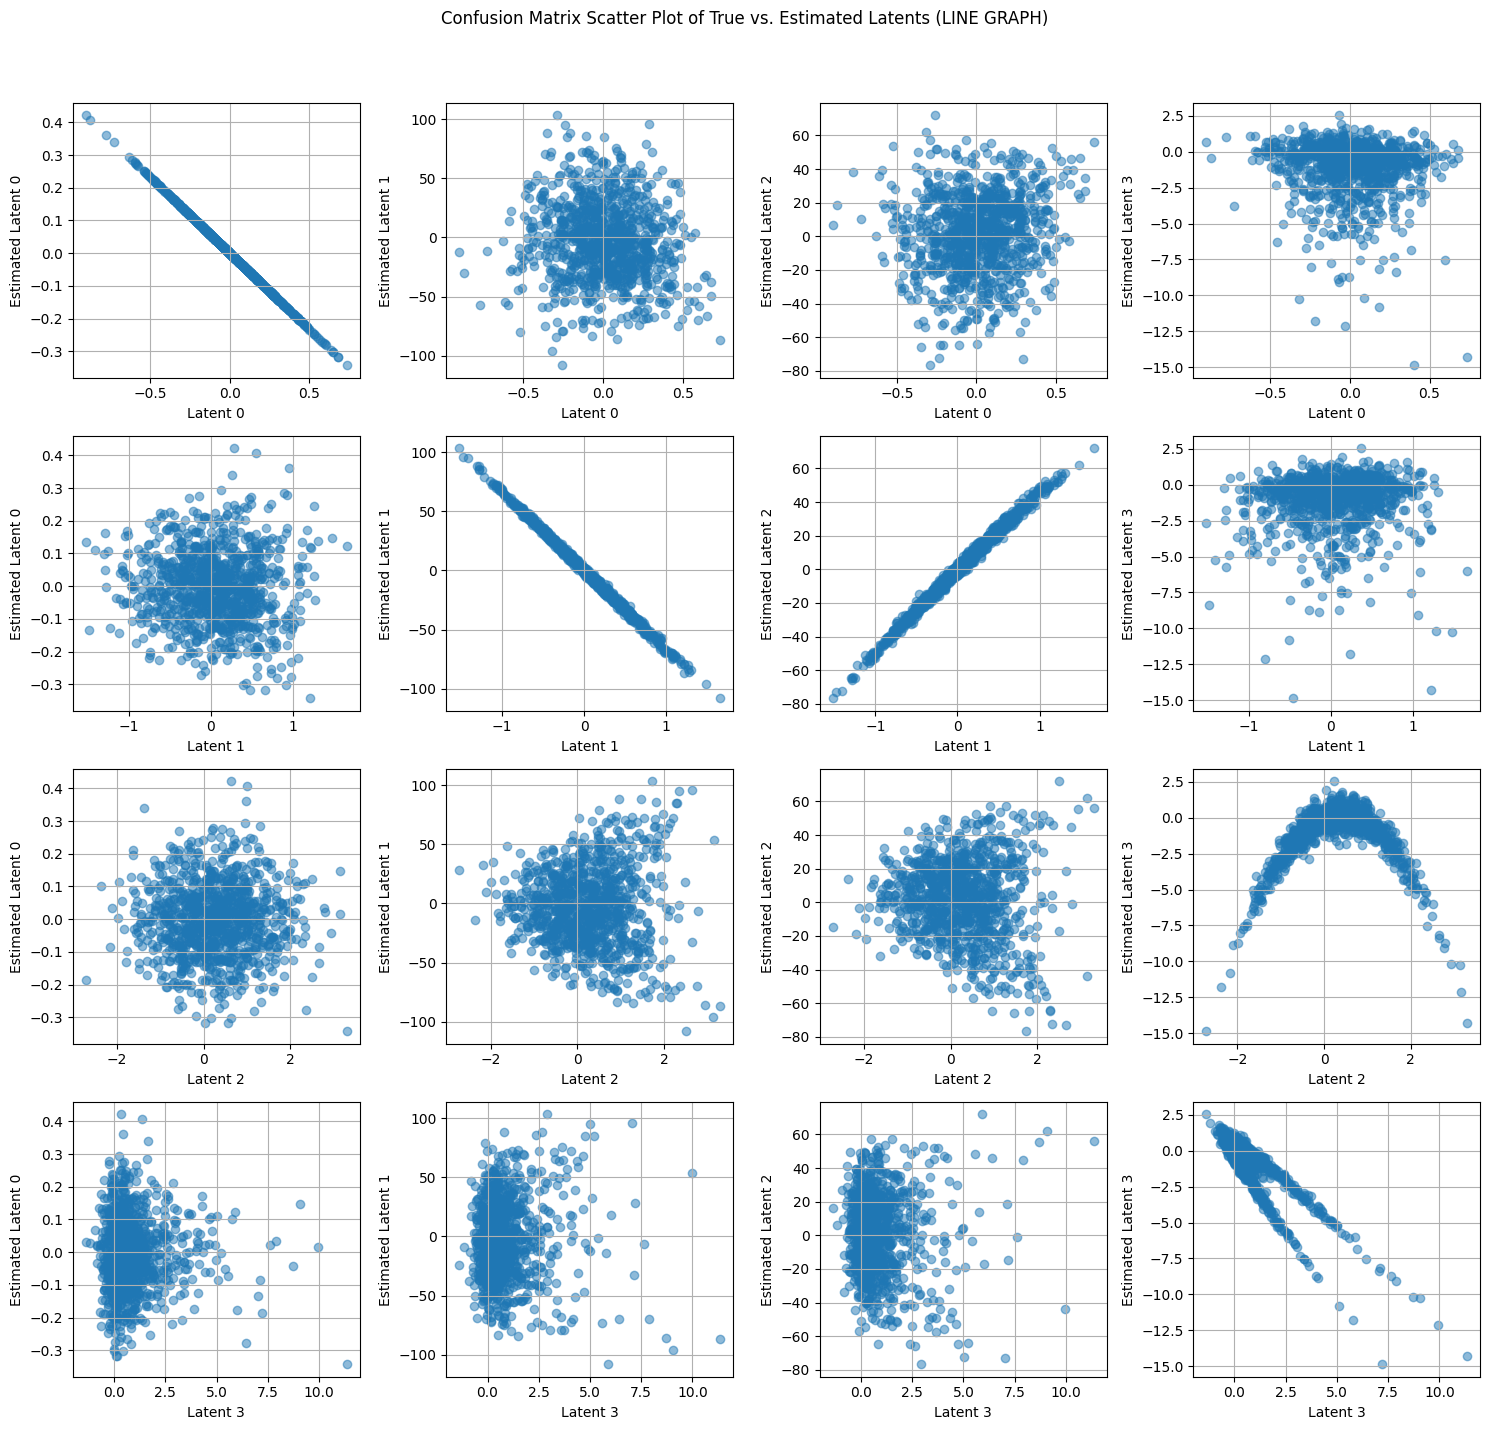

In [9]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (LINE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [276]:
#Pearson Correlation
#Mutual Information
#RMSE

results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent x True Latent': f'Est. Latent {j} x True Latent {i}',
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame using tabulate for a nicer format
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

| Est. Latent x True Latent     |   Pearson Correlation |   Mutual Information |      RMSE |
|:------------------------------|----------------------:|---------------------:|----------:|
| Est. Latent 0 x True Latent 0 |            -1         |             4.95749  |   1.1415  |
| Est. Latent 1 x True Latent 0 |             0.413689  |             0.585256 |  13.2269  |
| Est. Latent 2 x True Latent 0 |            -0.135412  |             0.330693 |   8.65443 |
| Est. Latent 3 x True Latent 0 |             0.171645  |             0.334302 | 175.378   |
| Est. Latent 0 x True Latent 1 |             0.0101012 |             0.509681 |   1.45724 |
| Est. Latent 1 x True Latent 1 |            -0.914551  |             1.15107  |  14.8503  |
| Est. Latent 2 x True Latent 1 |            -0.396999  |             0.678555 |   9.15641 |
| Est. Latent 3 x True Latent 1 |            -0.588864  |             0.667175 | 176.355   |
| Est. Latent 0 x True Latent 2 |             0.0775629 |             

# Y Structure

In [282]:
DAG_type = 'line'
num_latent = 4
num_samples = 500
variance_max = 1
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat

In [283]:
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type, variance_max)
graph.DAG.add_arc(1,3)
graph.DAG.remove_arc(2,3)

there are no undirected edges
plotting...


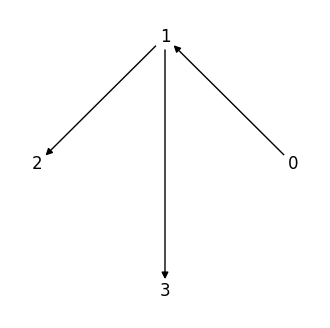

In [284]:
graph.draw_graph()

In [285]:
U = graph.get_samples()

In [286]:
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.17458578  0.3770482  -0.63541918  0.65084306]

Optimal solution found:
[-0.13262191 -0.06959588  0.70526281  0.69329251]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[9.39786899e-14 2.32407132e-09 7.76363971e+01 6.02739611e+01]

U_hat as a linear combination of U:
[[ 6.37926502e-01 -1.90724079e+00 -1.40596328e+00  8.59456970e-01]
 [ 3.02799343e-01 -4.61062852e-01  1.27274222e+00  1.60537131e+00]
 [-1.55227217e+00  4.49865072e+00 -1.86004147e-03 -1.66844151e-04]
 [ 1.96047736e+00 -4.09320150e+00  2.38211629e-03  2.48718947e-04]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.7393036  -0.67303823]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[1.61970681e-08 1.85614106e+02]

U_hat as a linear combination of U:
[[-2.56517707e+00  6.08309133e+00]
 [ 4.16194364e-01  1.69201942e-03]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-1.00024997]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[1.64216565e-10]

U_hat as a linear combination of U:
[[-0.41609037]]

Peeled off 1 nodes.


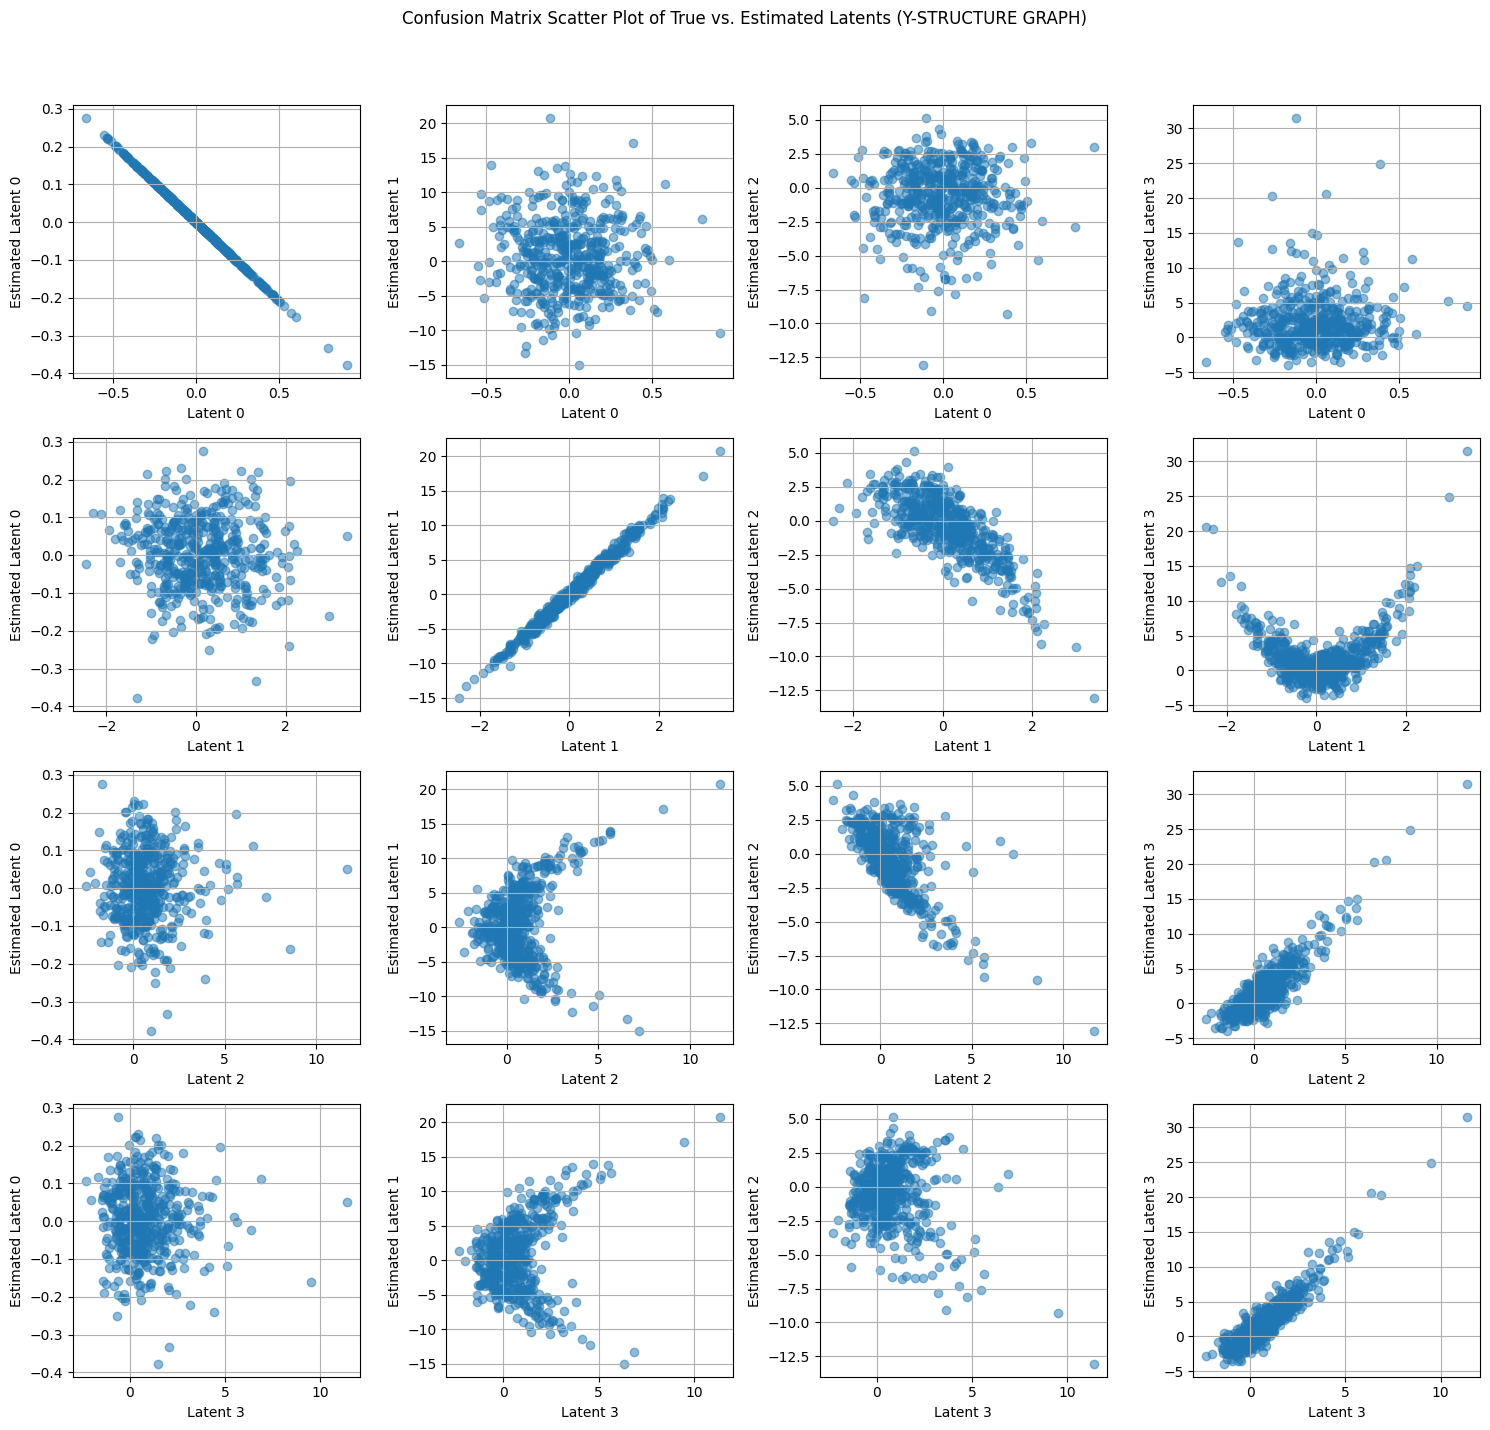

In [287]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (Y-STRUCTURE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [288]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent x True Latent': f'Est. Latent {j} x True Latent {i}',
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame using tabulate for a nicer format
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

| Est. Latent x True Latent     |   Pearson Correlation |   Mutual Information |     RMSE |
|:------------------------------|----------------------:|---------------------:|---------:|
| Est. Latent 0 x True Latent 0 |            -1         |           4.95749    | 0.321646 |
| Est. Latent 1 x True Latent 0 |            -0.0262006 |           0.0248391  | 5.33882  |
| Est. Latent 2 x True Latent 0 |             0.0123031 |           0.0395547  | 2.45528  |
| Est. Latent 3 x True Latent 0 |             0.0393008 |           0.00807578 | 4.29914  |
| Est. Latent 0 x True Latent 1 |            -0.083676  |           0.0366925  | 0.890506 |
| Est. Latent 1 x True Latent 1 |             0.993959  |           2.25871    | 4.45531  |
| Est. Latent 2 x True Latent 1 |            -0.758752  |           0.41035    | 3.16886  |
| Est. Latent 3 x True Latent 1 |             0.172907  |           0.473177   | 4.20322  |
| Est. Latent 0 x True Latent 2 |            -0.0119496 |           0          |

# Barabasi-Albert Graph

In [294]:
DAG_type = 'barabasialbert'
num_latent = 4
num_samples = 500
variance_max = 1
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat

there are no undirected edges
plotting...


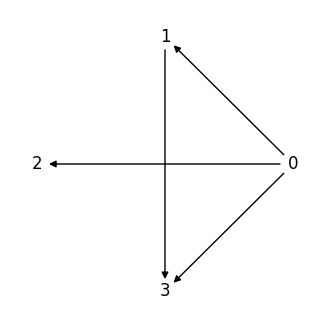

In [295]:
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type, variance_max)
graph.draw_graph()

In [296]:
U = graph.get_samples()
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.20849531 -0.44384094  0.51607443 -0.70228224]

Optimal solution found:
[ 0.66250408 -0.50713708  0.04401859  0.54954268]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[1.52380049e-10 1.81588339e-10 2.18788596e+02 9.85549197e+03]

U_hat as a linear combination of U:
[[-1.07140448e-01 -7.00704565e-01  2.24423083e-01 -1.72416114e+00]
 [ 9.37375054e-01 -7.47510809e-01  1.43095286e+00 -1.89826883e-01]
 [-7.09873154e-01  1.40234470e+00  3.23159649e-06 -2.51995230e-06]
 [-5.02303672e-03 -5.56277909e-01 -9.14550609e-07  4.79370301e-07]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.92977334  0.36881096]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[2.42733086e-08 7.67571805e+03]

U_hat as a linear combination of U:
[[ 5.91934050e-01 -1.50827303e+00]
 [-2.74447519e-01 -1.26564992e-05]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-1.00024997]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[1.68569026e-10]

U_hat as a linear combination of U:
[[0.27437894]]

Peeled off 1 nodes.


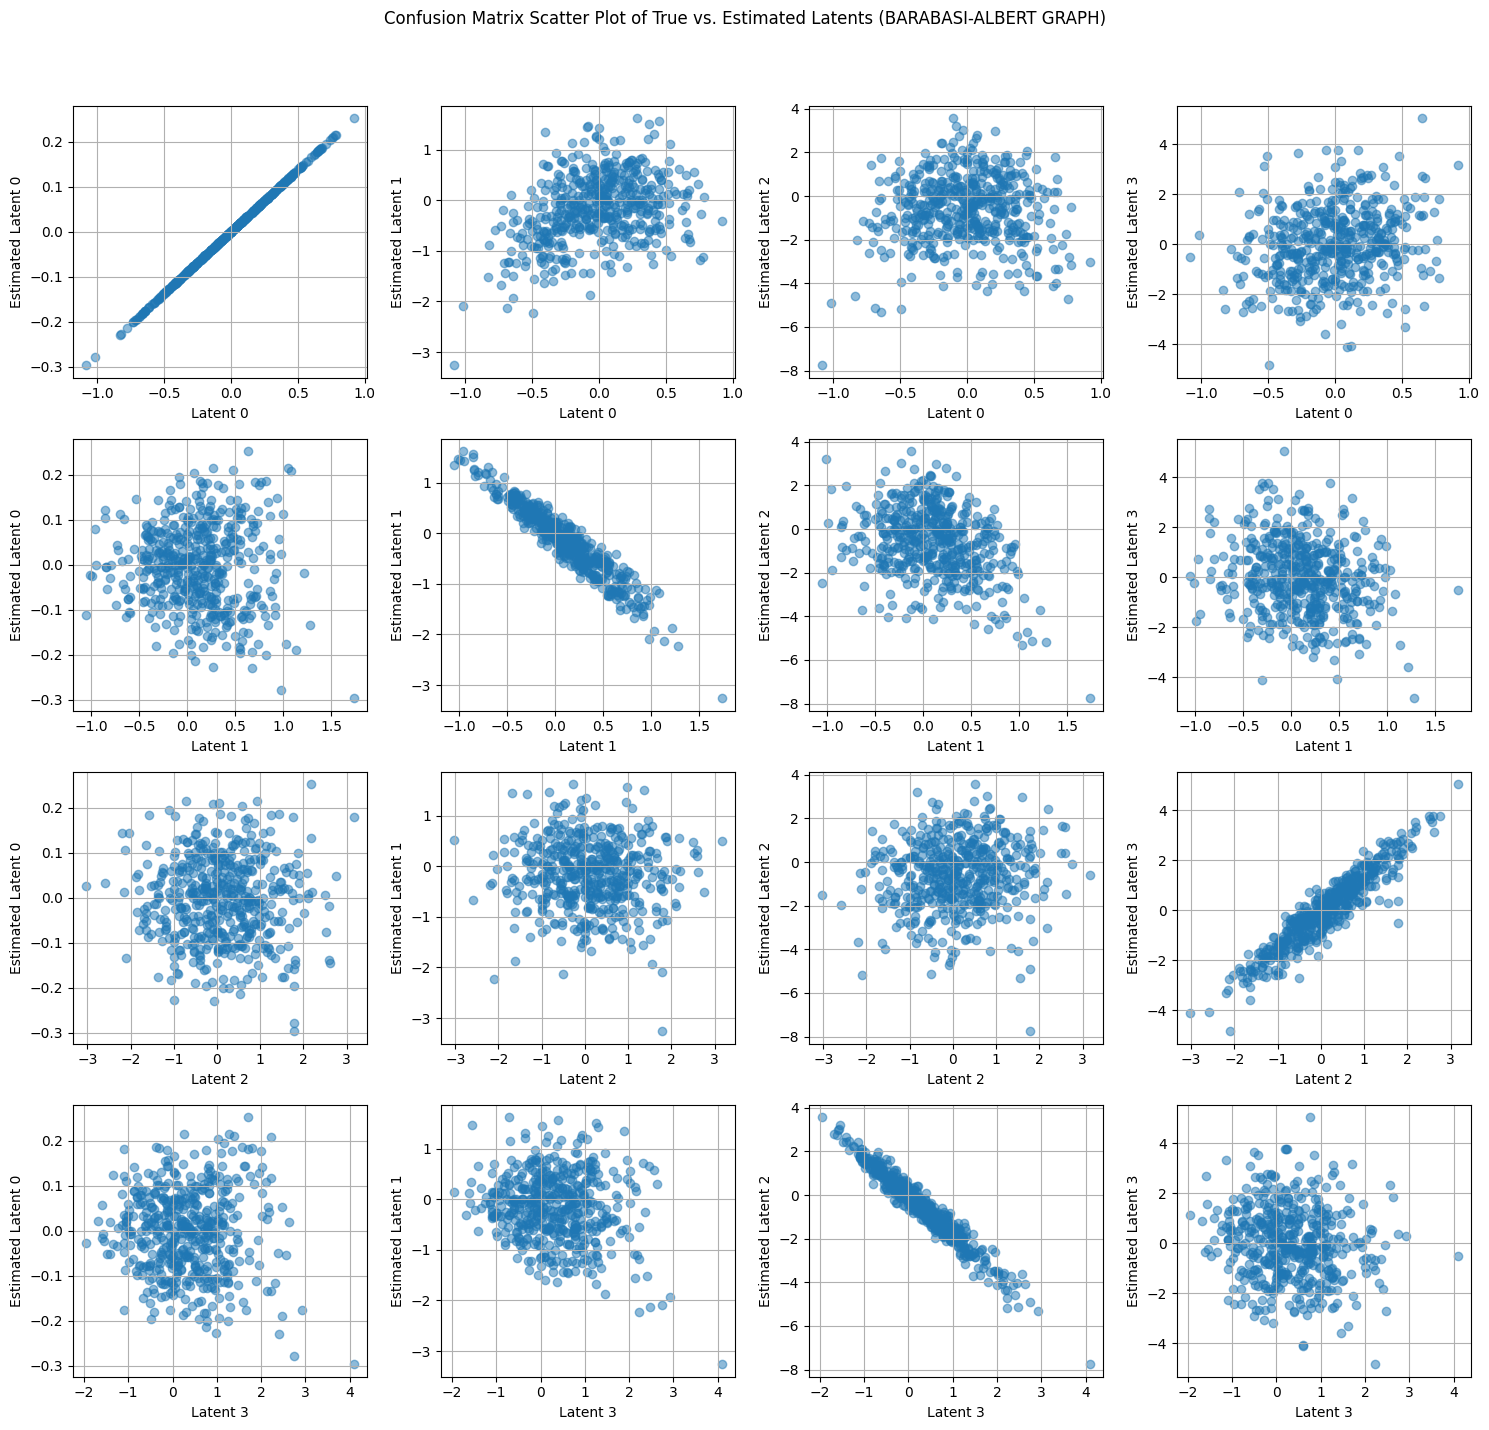

Estimated Latent 0 x True Latent 0
Pearson Correlation: 0.9999999999999996
Mutual Information: [4.9574901]
RMSE: 0.24690230754459316

Estimated Latent 1 x True Latent 0
Pearson Correlation: 0.3502147007263639
Mutual Information: [0.08032766]
RMSE: 0.6581625786051795

Estimated Latent 2 x True Latent 0
Pearson Correlation: 0.02815105643313954
Mutual Information: [0.06951645]
RMSE: 1.714226677813125

Estimated Latent 3 x True Latent 0
Pearson Correlation: 0.21330568098142214
Mutual Information: [0.06476469]
RMSE: 1.4238608733184954

Estimated Latent 0 x True Latent 1
Pearson Correlation: -0.055373803531717475
Mutual Information: [0.02902951]
RMSE: 0.44819292927778254

Estimated Latent 1 x True Latent 1
Pearson Correlation: -0.9546250347039956
Mutual Information: [1.26402218]
RMSE: 1.115797725927152

Estimated Latent 2 x True Latent 1
Pearson Correlation: -0.3345794034569307
Mutual Information: [0.09188269]
RMSE: 1.9047985687134974

Estimated Latent 3 x True Latent 1
Pearson Correlation: 

In [297]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (BARABASI-ALBERT GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        print(f'Estimated Latent {j} x True Latent {i}')
        print("Pearson Correlation:", np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1])
        print("Mutual Information:", mutual_info_regression(U_np[:,i].reshape(-1, 1), id_layers[:, j]))
        print("RMSE:", np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j])))
        print()

In [298]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent x True Latent': f'Est. Latent {j} x True Latent {i}',
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame using tabulate for a nicer format
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

| Est. Latent x True Latent     |   Pearson Correlation |   Mutual Information |     RMSE |
|:------------------------------|----------------------:|---------------------:|---------:|
| Est. Latent 0 x True Latent 0 |             1         |            4.95749   | 0.246902 |
| Est. Latent 1 x True Latent 0 |             0.350215  |            0.0803277 | 0.658163 |
| Est. Latent 2 x True Latent 0 |             0.0281511 |            0.0695165 | 1.71423  |
| Est. Latent 3 x True Latent 0 |             0.213306  |            0.0647647 | 1.42386  |
| Est. Latent 0 x True Latent 1 |            -0.0553738 |            0.0290295 | 0.448193 |
| Est. Latent 1 x True Latent 1 |            -0.954625  |            1.26402   | 1.1158   |
| Est. Latent 2 x True Latent 1 |            -0.334579  |            0.0918827 | 1.9048   |
| Est. Latent 3 x True Latent 1 |            -0.200185  |            0.0405595 | 1.59866  |
| Est. Latent 0 x True Latent 2 |            -0.0236577 |            0         |

# Instar

there are no undirected edges
plotting...


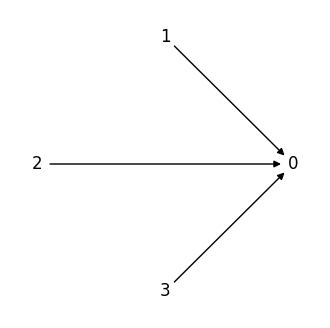

In [299]:
DAG_type = 'instar'

G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type, variance_max)
graph.draw_graph()

In [300]:
U = graph.get_samples()
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.95803649 -0.1125501  -0.25745895 -0.05209158]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[3.71495360e-08 1.96124655e+00 2.58648486e+00 2.49308342e+00]

U_hat as a linear combination of U:
[[-8.39225141e-01 -9.40517261e+01  8.62641947e+01 -6.81552189e+01]
 [-3.57137401e-03 -1.34986626e+02  1.28641759e+02 -1.03506922e+02]
 [ 1.33011337e-02  5.04312647e+02 -4.66278356e+02  3.73311433e+02]
 [-1.11649492e-02 -4.24854459e+02  3.91435040e+02 -3.10083793e+02]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-1.00024997  0.          0.        ]

Optimal solution found:
[ 0.         -0.8365641  -0.54832519]

Optimal solution found:
[ 0.         -0.54832519  0.8365641 ]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[2.64664168e-15 6.14198038e-15 2.16241128e-16]

U_hat as a linear combination of U:
[[ 134.95289929 -128.60960577  103.48105283]
 [-188.8370373   175.35036657 -142.20108143]
 [-631.62950444  582.84123462 -463.86910177]]

Peeled off 3 nodes.


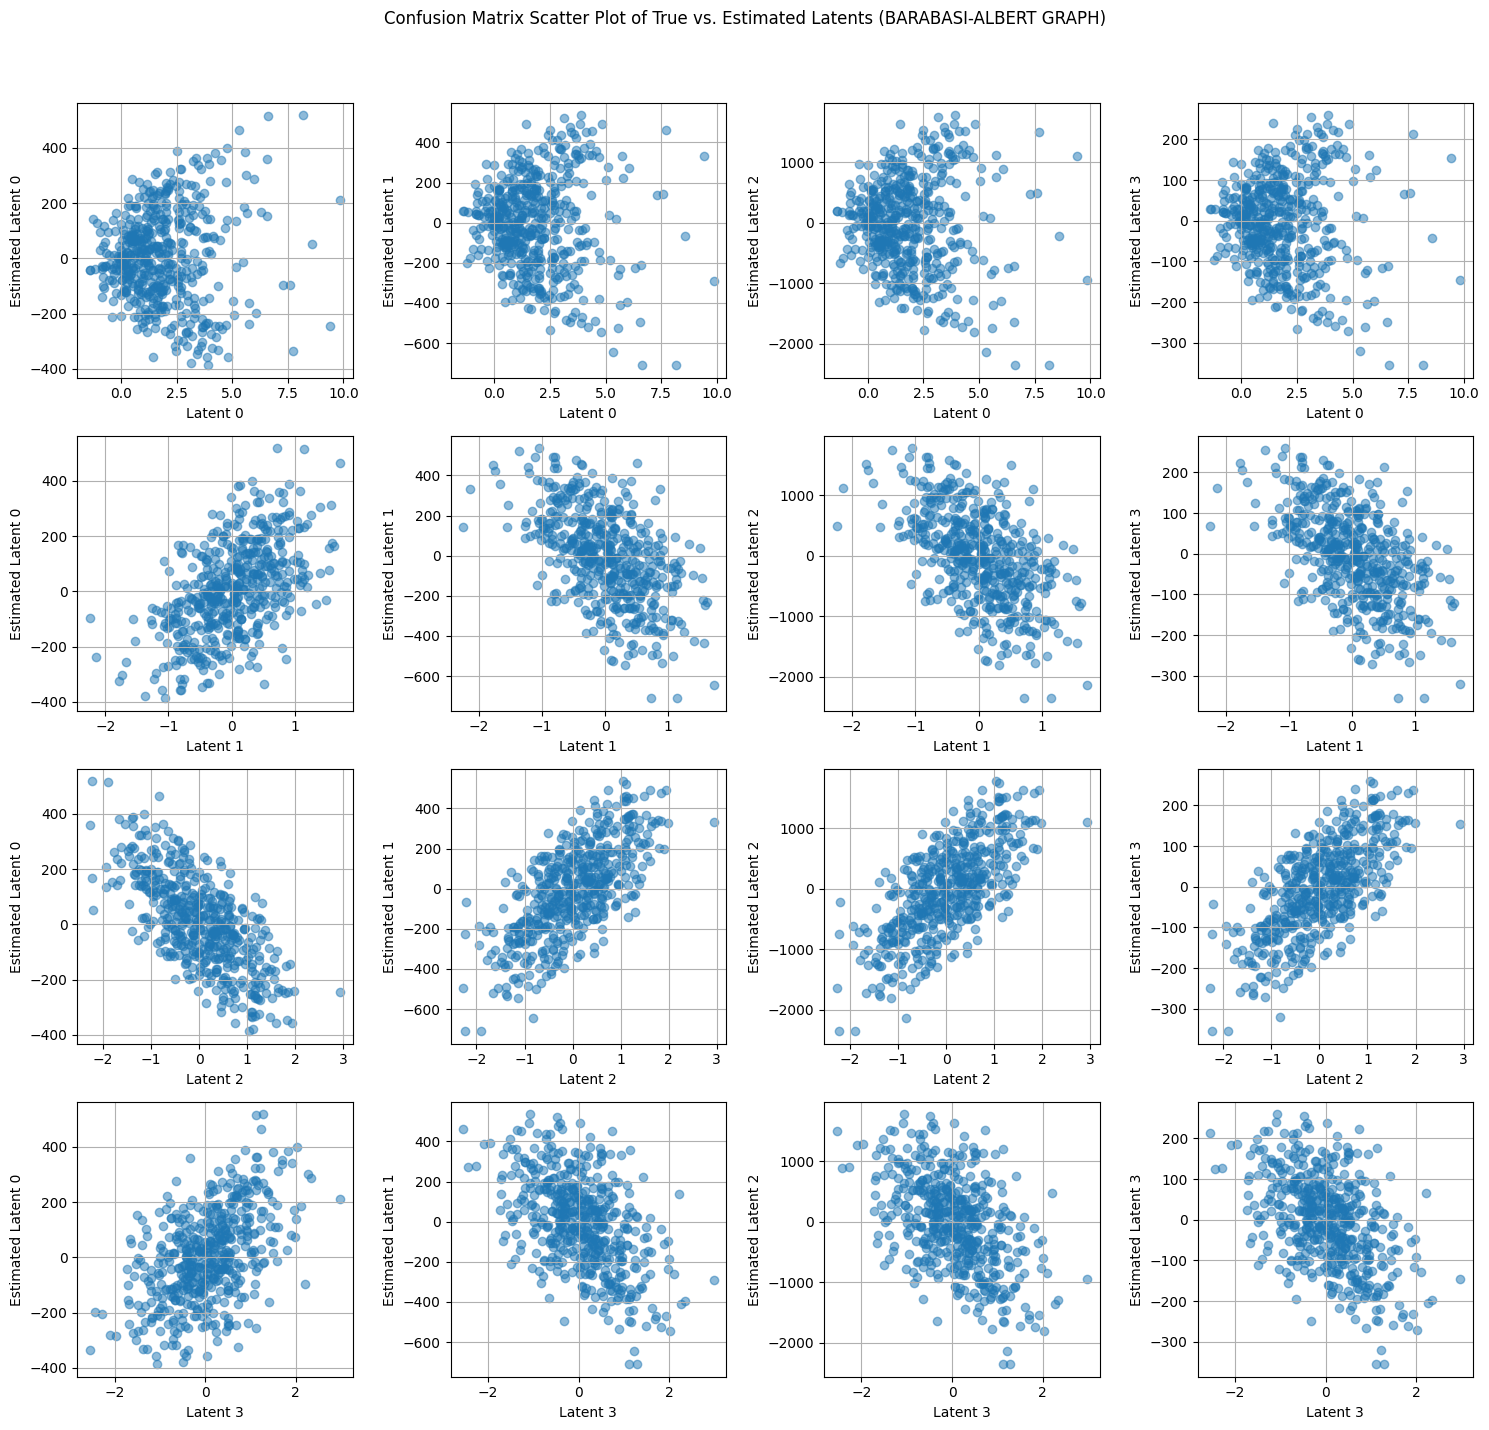

Estimated Latent 0 x True Latent 0
Pearson Correlation: 0.051682243284894396
Mutual Information: [0.12916455]
RMSE: 166.88927075030688

Estimated Latent 1 x True Latent 0
Pearson Correlation: -0.05187279707618174
Mutual Information: [0.11864434]
RMSE: 230.0281508700413

Estimated Latent 2 x True Latent 0
Pearson Correlation: -0.051509291883556456
Mutual Information: [0.11719491]
RMSE: 761.8507536292467

Estimated Latent 3 x True Latent 0
Pearson Correlation: -0.06408116985731786
Mutual Information: [0.11931721]
RMSE: 113.08977959035444

Estimated Latent 0 x True Latent 1
Pearson Correlation: 0.534043988722247
Mutual Information: [0.15952837]
RMSE: 166.67434600019084

Estimated Latent 1 x True Latent 1
Pearson Correlation: -0.5423512488307112
Mutual Information: [0.16689122]
RMSE: 230.21623994139026

Estimated Latent 2 x True Latent 1
Pearson Correlation: -0.5479020778814861
Mutual Information: [0.17279955]
RMSE: 762.0530169374707

Estimated Latent 3 x True Latent 1
Pearson Correlation:

In [301]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (BARABASI-ALBERT GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        print(f'Estimated Latent {j} x True Latent {i}')
        print("Pearson Correlation:", np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1])
        print("Mutual Information:", mutual_info_regression(U_np[:,i].reshape(-1, 1), id_layers[:, j]))
        print("RMSE:", np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j])))
        print()

In [302]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent x True Latent': f'Est. Latent {j} x True Latent {i}',
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame using tabulate for a nicer format
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

| Est. Latent x True Latent     |   Pearson Correlation |   Mutual Information |    RMSE |
|:------------------------------|----------------------:|---------------------:|--------:|
| Est. Latent 0 x True Latent 0 |             0.0516822 |             0.129165 | 166.889 |
| Est. Latent 1 x True Latent 0 |            -0.0518728 |             0.118644 | 230.028 |
| Est. Latent 2 x True Latent 0 |            -0.0515093 |             0.117195 | 761.851 |
| Est. Latent 3 x True Latent 0 |            -0.0640812 |             0.119317 | 113.09  |
| Est. Latent 0 x True Latent 1 |             0.534044  |             0.159528 | 166.674 |
| Est. Latent 1 x True Latent 1 |            -0.542351  |             0.166891 | 230.216 |
| Est. Latent 2 x True Latent 1 |            -0.547902  |             0.1728   | 762.053 |
| Est. Latent 3 x True Latent 1 |            -0.55137   |             0.178672 | 113.224 |
| Est. Latent 0 x True Latent 2 |            -0.69834   |             0.334075 | 167.611 |

# Outstar

there are no undirected edges
plotting...


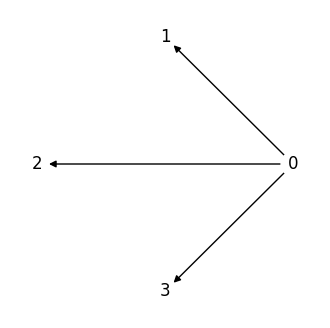

In [305]:
DAG_type = 'outstar'

G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type, variance_max)
graph.draw_graph()

In [306]:
U = graph.get_samples()
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.11928076 -0.66481124  0.65081143  0.34682035]

Optimal solution found:
[ 0.          0.61052048  0.75341015 -0.24348936]

Optimal solution found:
[ 0.42679821  0.41600019 -0.0789497   0.79878287]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[2.84957501e-14 6.50010705e-09 2.49567045e-08 1.65780521e+00]

U_hat as a linear combination of U:
[[-3.27356114e-01 -1.29455764e+00  9.19827445e-01  2.60675287e-01]
 [-1.05955899e+01  1.12442413e+00  1.39124157e+00 -8.83116536e-01]
 [-6.17881537e+00  1.93972104e-01 -3.30912311e-01  1.26207552e+00]
 [ 1.23034460e+01  1.56817170e-04  1.28529086e-04  4.07599142e-05]]

Peeled off 3 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-1.00024997]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[1.40578395e-18]

U_hat as a linear combination of U:
[[-12.30037111]]

Peeled off 1 nodes.


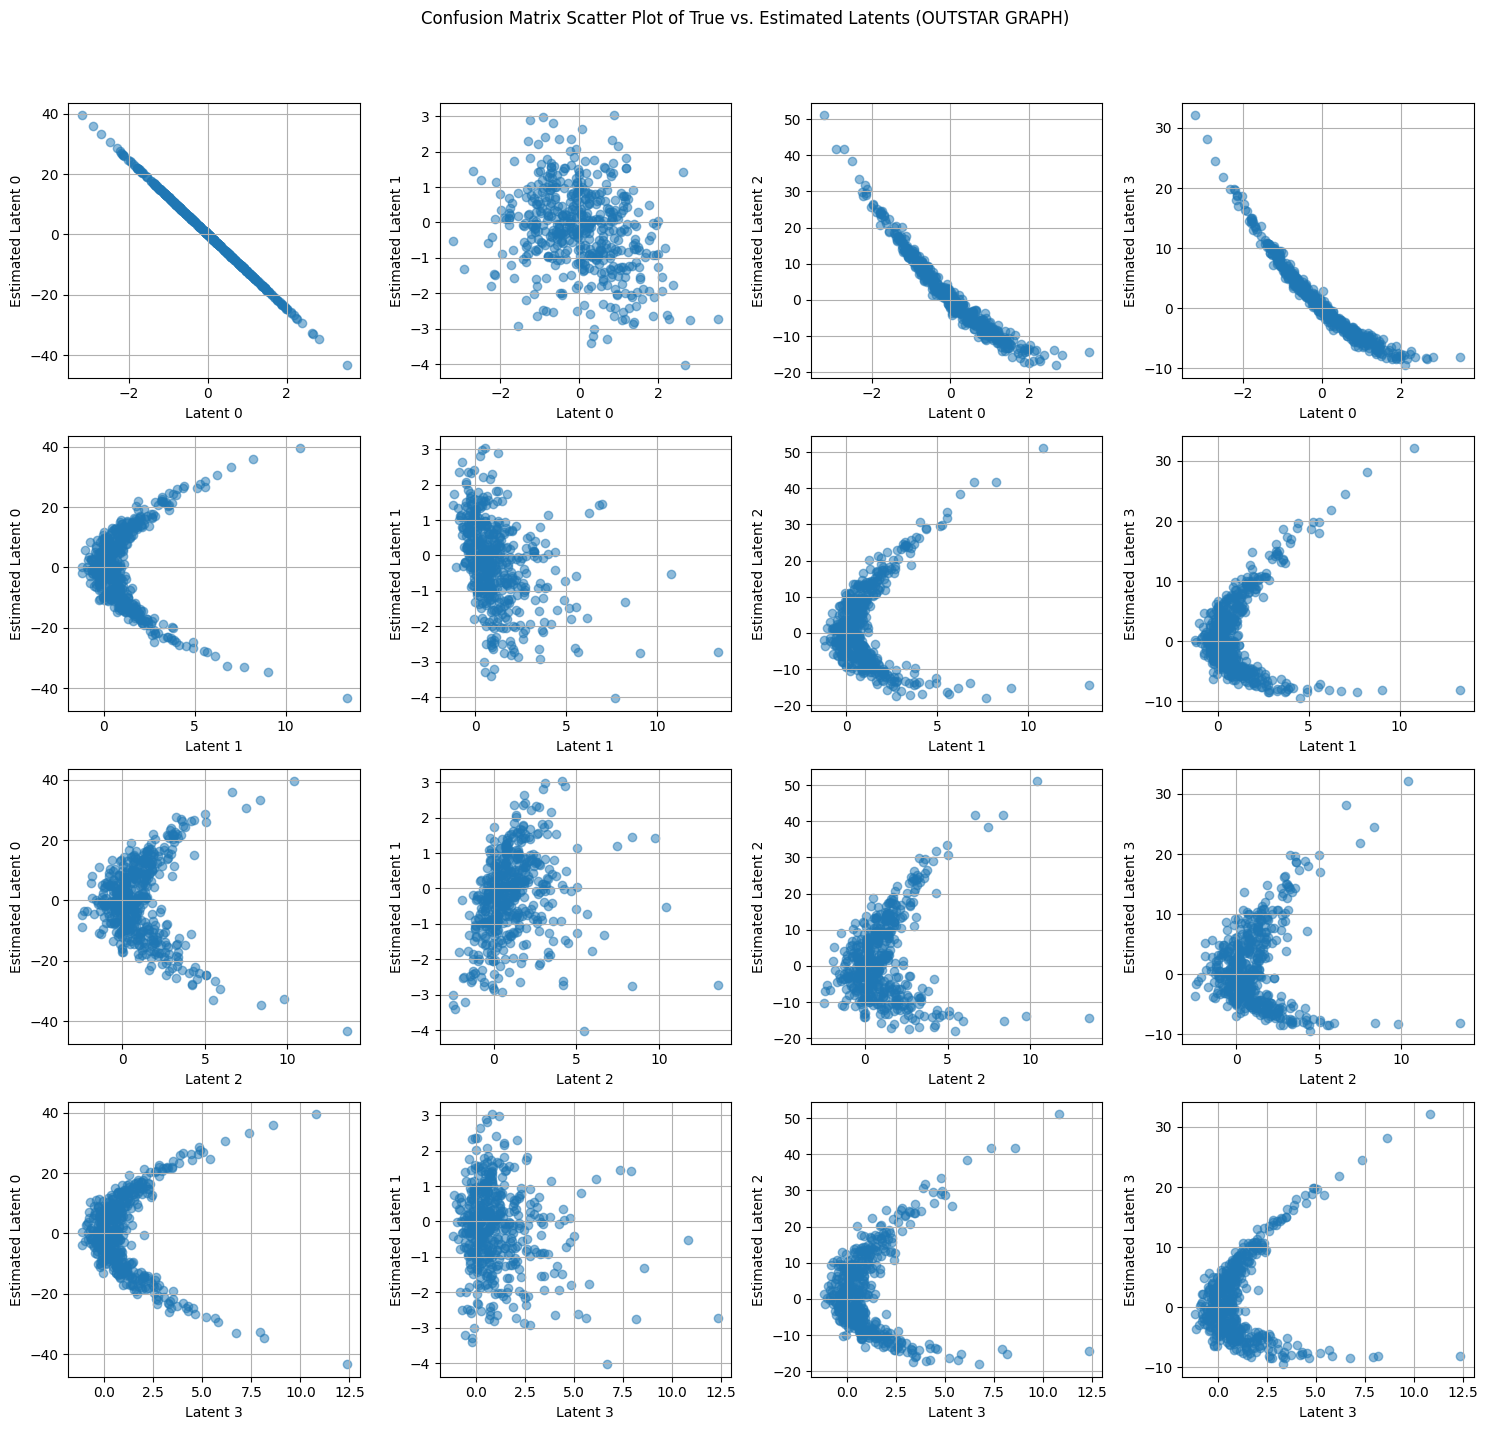

Estimated Latent 0 x True Latent 0
Pearson Correlation: -0.9999999999999997
Mutual Information: [4.9574901]
RMSE: 13.460622796265138

Estimated Latent 1 x True Latent 0
Pearson Correlation: -0.2788910838959309
Mutual Information: [0.0517146]
RMSE: 1.7667435880190783

Estimated Latent 2 x True Latent 0
Pearson Correlation: -0.9662280264633702
Mutual Information: [1.9101812]
RMSE: 12.086399989256218

Estimated Latent 3 x True Latent 0
Pearson Correlation: -0.9597045992682429
Mutual Information: [2.06792383]
RMSE: 7.521387668321809

Estimated Latent 0 x True Latent 1
Pearson Correlation: -0.03863716741047057
Mutual Information: [0.77948418]
RMSE: 12.65567943343583

Estimated Latent 1 x True Latent 1
Pearson Correlation: -0.37964363861113876
Mutual Information: [0.17332365]
RMSE: 2.6428944107323016

Estimated Latent 2 x True Latent 1
Pearson Correlation: 0.1862001961544081
Mutual Information: [0.67133482]
RMSE: 10.813262922024615

Estimated Latent 3 x True Latent 1
Pearson Correlation: 0.2

In [307]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (OUTSTAR GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        print(f'Estimated Latent {j} x True Latent {i}')
        print("Pearson Correlation:", np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1])
        print("Mutual Information:", mutual_info_regression(U_np[:,i].reshape(-1, 1), id_layers[:, j]))
        print("RMSE:", np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j])))
        print()

In [309]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent x True Latent': f'Est. Latent {j} x True Latent {i}',
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame using tabulate for a nicer format
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

| Est. Latent x True Latent     |   Pearson Correlation |   Mutual Information |     RMSE |
|:------------------------------|----------------------:|---------------------:|---------:|
| Est. Latent 0 x True Latent 0 |            -1         |            4.95749   | 13.4606  |
| Est. Latent 1 x True Latent 0 |            -0.278891  |            0.0517146 |  1.76674 |
| Est. Latent 2 x True Latent 0 |            -0.966228  |            1.91018   | 12.0864  |
| Est. Latent 3 x True Latent 0 |            -0.959705  |            2.06792   |  7.52139 |
| Est. Latent 0 x True Latent 1 |            -0.0386372 |            0.779484  | 12.6557  |
| Est. Latent 1 x True Latent 1 |            -0.379644  |            0.173324  |  2.64289 |
| Est. Latent 2 x True Latent 1 |             0.1862    |            0.671335  | 10.8133  |
| Est. Latent 3 x True Latent 1 |             0.211286  |            0.641254  |  6.31332 |
| Est. Latent 0 x True Latent 2 |            -0.0420693 |            0.449455  |

# TREE

there are no undirected edges
plotting...


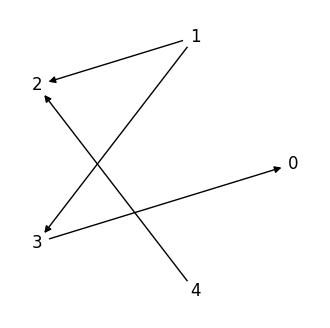

In [310]:
DAG_type = 'tree'

G = sample_full_rank_matrix(5, lower_G, upper_G)+torch.eye(5)
graph = SyntheticDAG(5, DAG_type, variance_max)
graph.draw_graph()

In [311]:
U = graph.get_samples()
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.56398529 -0.3519133  -0.46347572 -0.52142462 -0.2671779 ]

Optimal solution found:
[-0.67469941  0.09214153 -0.69278688 -0.22049495  0.08651545]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[4.59391580e-14 3.23392280e-08 3.20199473e+00 3.28855980e+00
 2.46244578e+00]

U_hat as a linear combination of U:
[[ 2.09865258e+00  8.55666730e-01 -1.62170466e+00  3.58019379e-01
  -2.11111092e+00]
 [-1.01229231e+00  1.19755135e+00 -3.73193313e-04 -1.09283111e+00
   9.73120431e-01]
 [-1.45304253e-03  6.28100273e+00  1.25570098e-03  9.62971201e+00
  -9.85608464e+00]
 [ 2.43791550e-03 -6.72465774e+00 -2.03008226e-03 -1.55677956e+01
   1.11486995e+01]
 [-1.04660314e-03  3.34133847e+00  9.19402156e-04  7.05014337e+00
  -1.49478887e+00]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_

INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.20477604 -0.74021165  0.64067481]

Optimal solution found:
[-0.76602344  0.28651066  0.57586434]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[2.54240817e-08 2.63035079e-08 8.16167639e-01]

U_hat as a linear combination of U:
[[  8.4077715   18.00657246 -11.22480917]
 [ -5.92407654  -7.75784347   9.86620961]
 [  1.81595454  -0.02492168   0.0200255 ]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-1.00024997]

No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[1.49198784e-14]

U_hat as a linear combination of U:
[[-1.81550075]]

Peeled off 1 nodes.


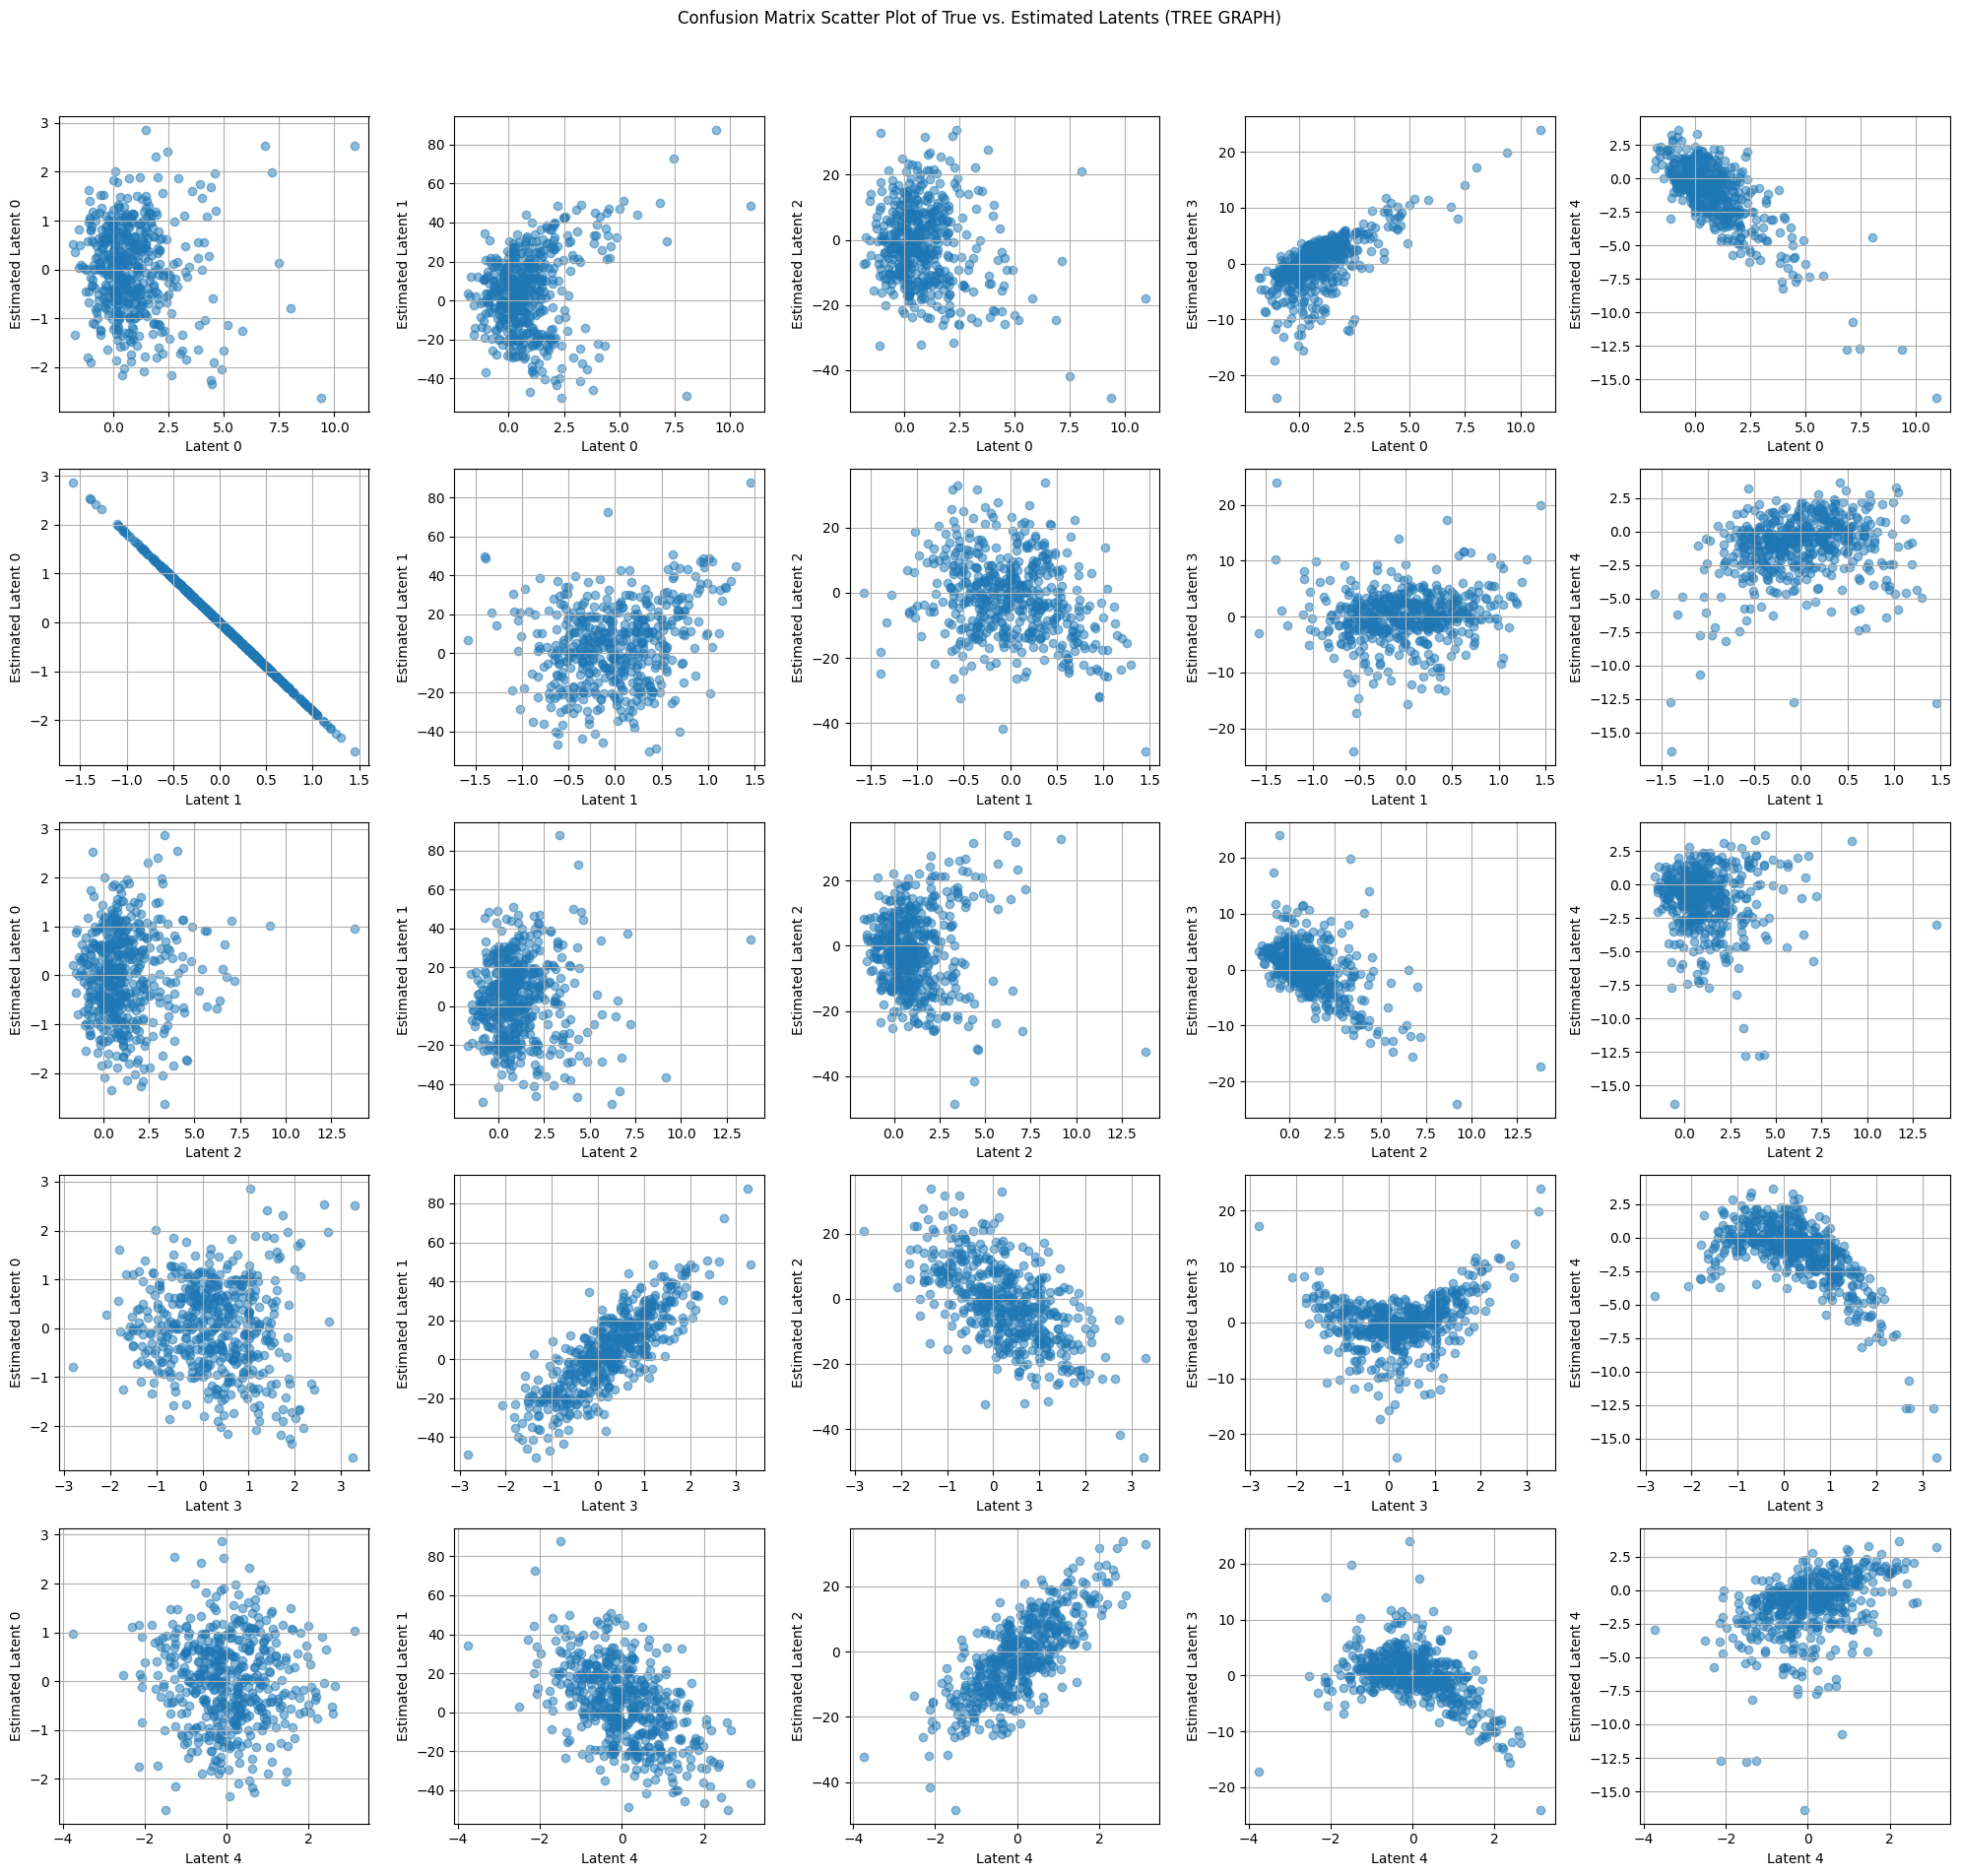

Estimated Latent 0 x True Latent 0
Pearson Correlation: -0.03486068371555851
Mutual Information: [0.00941052]
RMSE: 1.9952556981053253

Estimated Latent 1 x True Latent 0
Pearson Correlation: 0.26231040266310046
Mutual Information: [0.15591192]
RMSE: 20.443379578014756

Estimated Latent 2 x True Latent 0
Pearson Correlation: -0.1925095092364241
Mutual Information: [0.04135705]
RMSE: 12.92117451604328

Estimated Latent 3 x True Latent 0
Pearson Correlation: 0.6691822768365381
Mutual Information: [0.41582881]
RMSE: 4.0041368890998985

Estimated Latent 4 x True Latent 0
Pearson Correlation: -0.7817757983867021
Mutual Information: [0.39734586]
RMSE: 4.164274753361072

Estimated Latent 0 x True Latent 1
Pearson Correlation: -0.9999999999999998
Mutual Information: [4.9574901]
RMSE: 1.4232021555457022

Estimated Latent 1 x True Latent 1
Pearson Correlation: 0.24365592672116682
Mutual Information: [0.08518386]
RMSE: 20.815219063683163

Estimated Latent 2 x True Latent 1
Pearson Correlation: -0

In [312]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (TREE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

# Iterate over each combination of columns in A and B
for i in range(5):
    for j in range(5):
        print(f'Estimated Latent {j} x True Latent {i}')
        print("Pearson Correlation:", np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1])
        print("Mutual Information:", mutual_info_regression(U_np[:,i].reshape(-1, 1), id_layers[:, j]))
        print("RMSE:", np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j])))
        print()

In [313]:
num_latent=5
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent x True Latent': f'Est. Latent {j} x True Latent {i}',
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame using tabulate for a nicer format
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

| Est. Latent x True Latent     |   Pearson Correlation |   Mutual Information |     RMSE |
|:------------------------------|----------------------:|---------------------:|---------:|
| Est. Latent 0 x True Latent 0 |            -0.0348607 |           0.00941052 |  1.99526 |
| Est. Latent 1 x True Latent 0 |             0.26231   |           0.155912   | 20.4434  |
| Est. Latent 2 x True Latent 0 |            -0.19251   |           0.041357   | 12.9212  |
| Est. Latent 3 x True Latent 0 |             0.669182  |           0.415829   |  4.00414 |
| Est. Latent 4 x True Latent 0 |            -0.781776  |           0.397346   |  4.16427 |
| Est. Latent 0 x True Latent 1 |            -1         |           4.95749    |  1.4232  |
| Est. Latent 1 x True Latent 1 |             0.243656  |           0.0851839  | 20.8152  |
| Est. Latent 2 x True Latent 1 |            -0.253895  |           0.0614573  | 12.5514  |
| Est. Latent 3 x True Latent 1 |             0.128596  |           0.00810959 |

# OTHERS

there are no undirected edges
plotting...


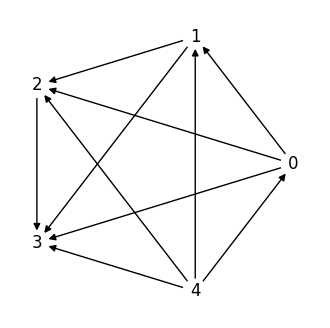

In [322]:
DAG_type = 'complete'
num_latent = 5
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type, variance_max)
graph.draw_graph()


In [323]:
U = graph.get_samples()

In [325]:
J_U = H_U(graph, U)

In [326]:
torch.var(J_U, axis=0)

tensor([[2.1648e+02, 4.7485e+01, 3.8527e+02, 4.5248e+00, 3.2629e+01],
        [4.7485e+01, 2.9460e+02, 1.6833e+03, 6.9194e+00, 1.3535e+01],
        [3.8527e+02, 1.6833e+03, 4.3468e+04, 5.0007e+01, 8.8436e+01],
        [4.5248e+00, 6.9194e+00, 5.0007e+01, 3.0119e-13, 1.7200e+00],
        [3.2629e+01, 1.3535e+01, 8.8436e+01, 1.7200e+00, 9.4412e+01]],
       grad_fn=<VarBackward0>)

In [327]:
U = graph.get_samples()
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


No feasible solution found.
Done.

Diagonal of Estimated Jacobian:
[228492.3881074  354162.39872197 225824.13047776 458671.19415682
   1093.82632844]

U_hat as a linear combination of U:
[[-1.5107459   1.91214796 -0.20206803 -2.9616842  -0.77181316]
 [-4.51804731 -1.03894386 -0.39742418 -3.30698667 -2.06615547]
 [ 2.13860088  1.54736634 -0.36672973  1.33122223  1.94191388]
 [-2.33847621 -0.78112653 -0.16105541 -0.48304523 -0.01597778]
 [ 5.88287921 -1.83277839  1.13176575  4.73025233  1.70589345]]

FOUND WRONG NUMBER OF LEAF NODES!
Peeled off 0 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...


RuntimeError: linalg.inv: A must be batches of square matrices, but they are 5 by 4 matrices

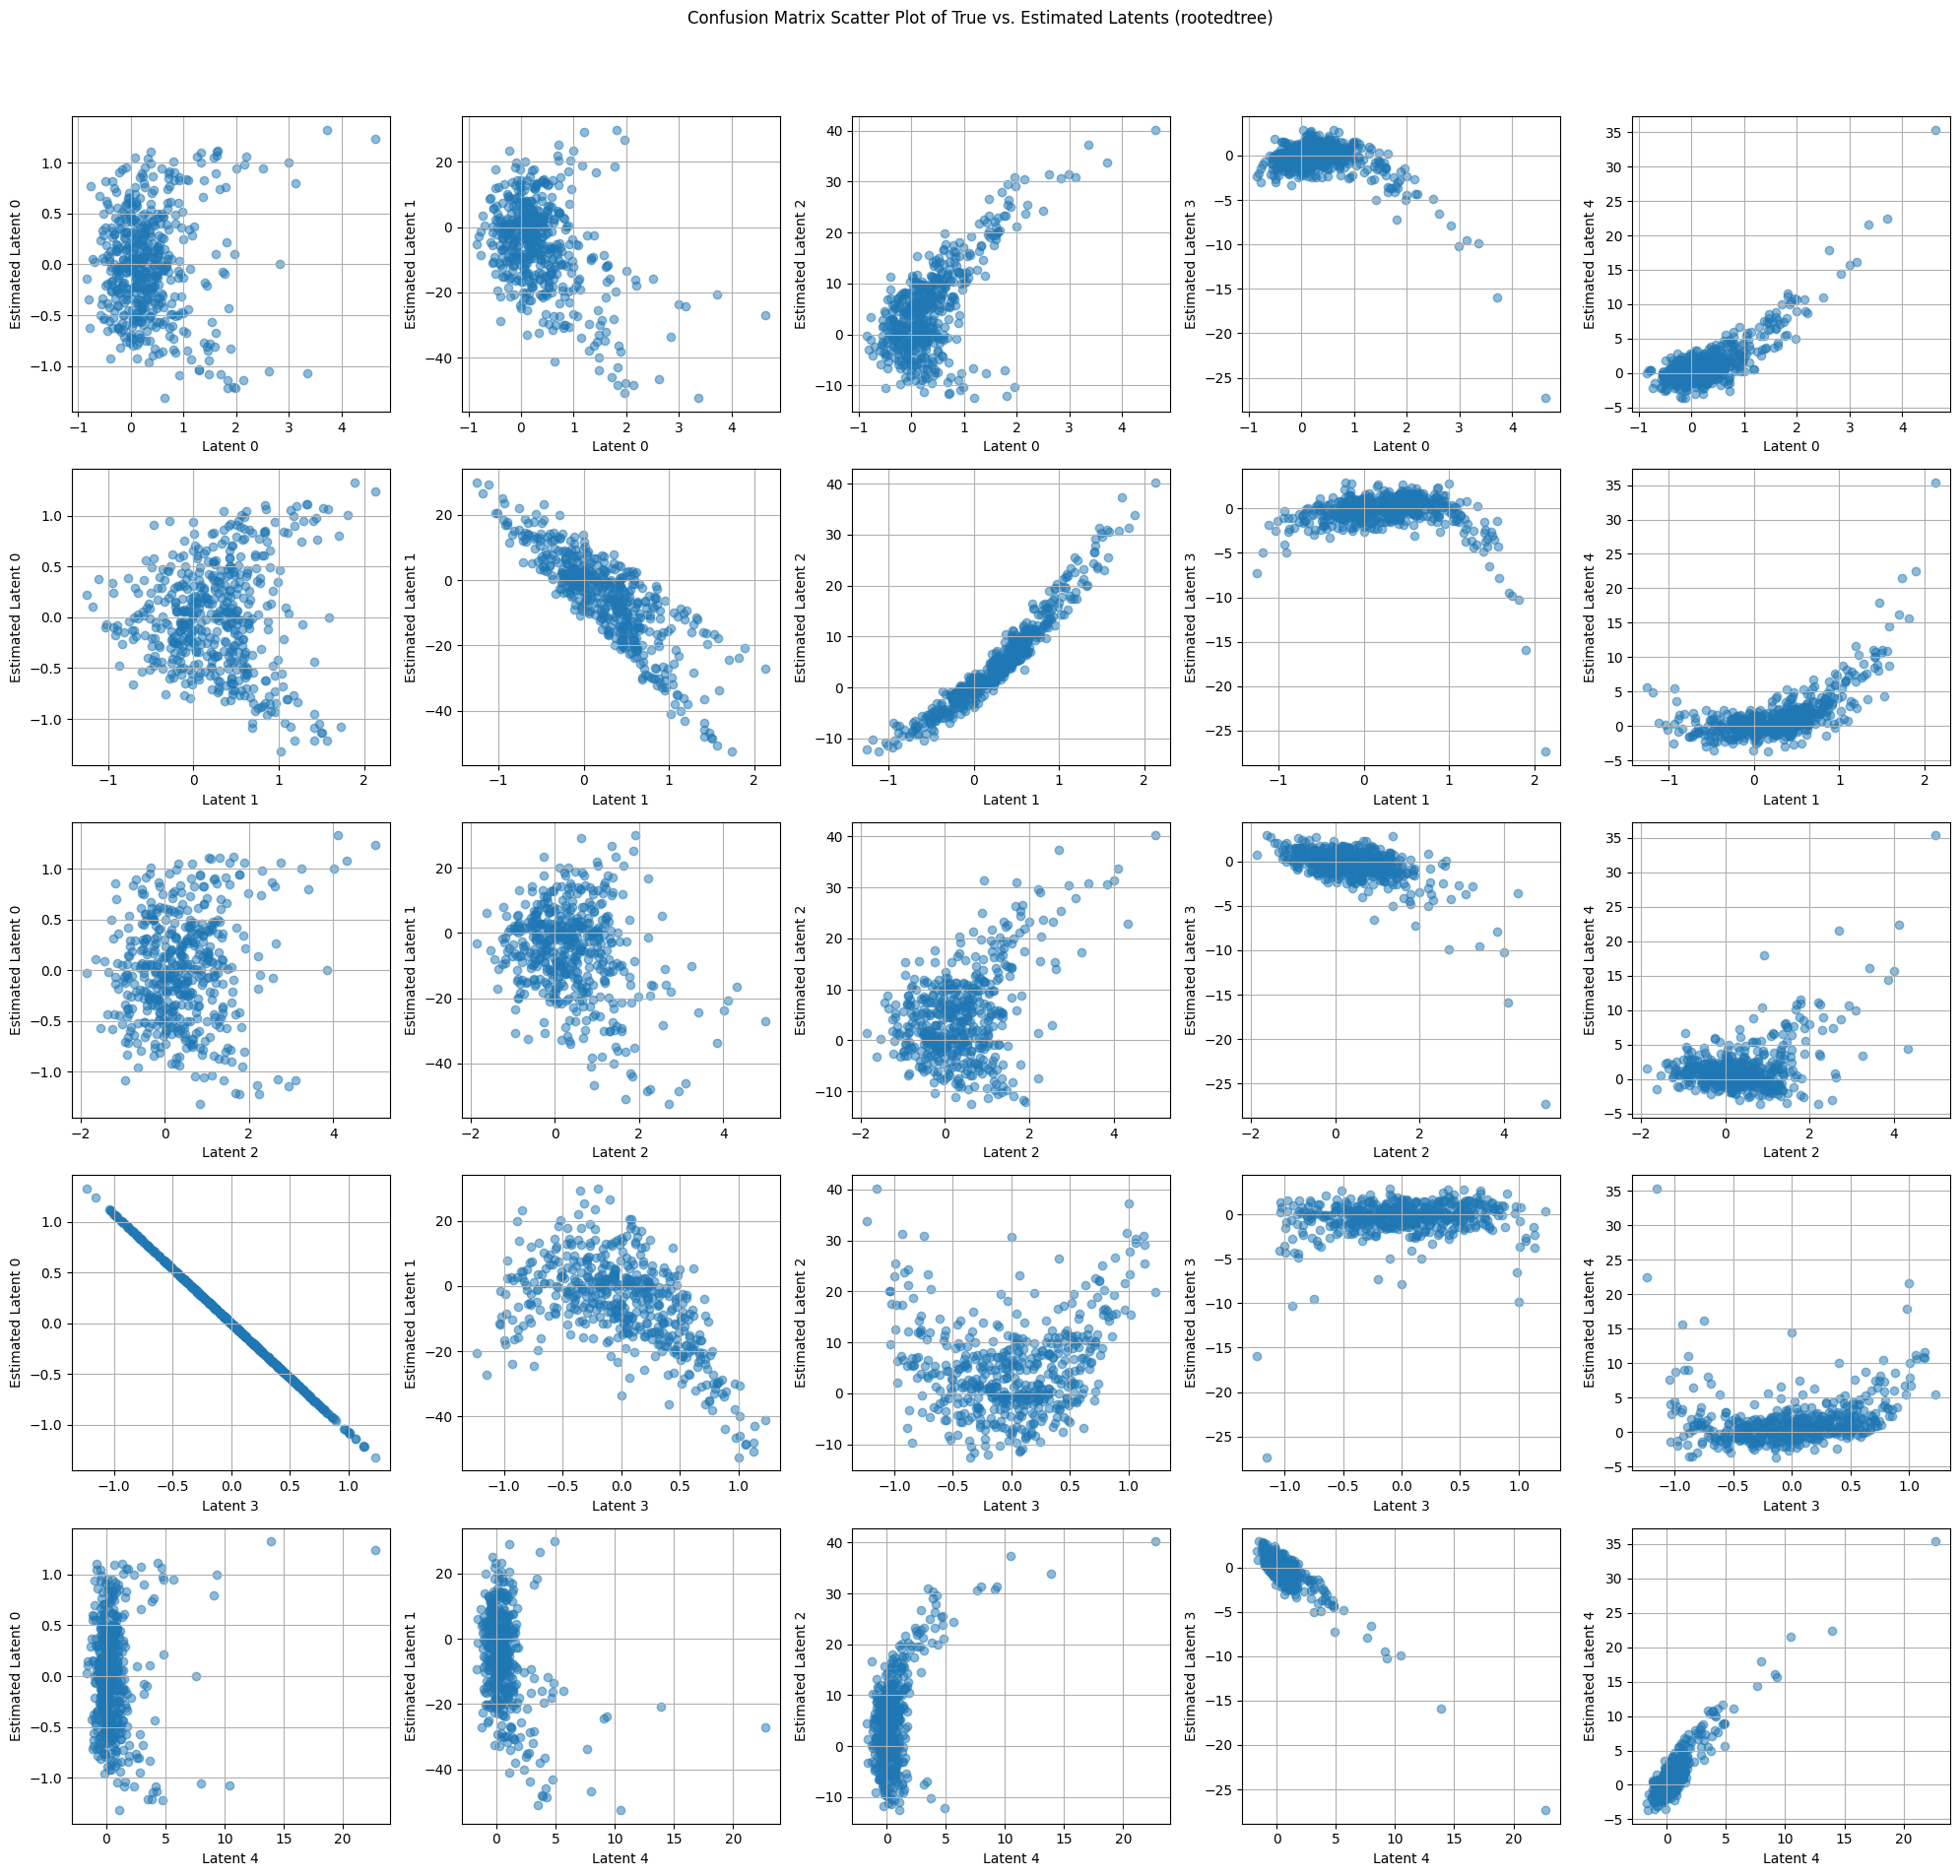

Estimated Latent 0 x True Latent 0
Pearson Correlation: 0.040969769220315484
Mutual Information: [0.10448854]
RMSE: 0.9084119054616019

Estimated Latent 1 x True Latent 0
Pearson Correlation: -0.41331651642090067
Mutual Information: [0.17542403]
RMSE: 15.269752172323429

Estimated Latent 2 x True Latent 0
Pearson Correlation: 0.6689365569483025
Mutual Information: [0.47073434]
RMSE: 9.480543614598215

Estimated Latent 3 x True Latent 0
Pearson Correlation: -0.5253948173242614
Mutual Information: [0.24891395]
RMSE: 2.6538413465880217

Estimated Latent 4 x True Latent 0
Pearson Correlation: 0.834398698851792
Mutual Information: [0.4314266]
RMSE: 3.168900239944564

Estimated Latent 0 x True Latent 1
Pearson Correlation: 0.022940428357451883
Mutual Information: [0.17660636]
RMSE: 0.7936871108196761

Estimated Latent 1 x True Latent 1
Pearson Correlation: -0.8333371446501942
Mutual Information: [0.70107298]
RMSE: 15.390533907271704

Estimated Latent 2 x True Latent 1
Pearson Correlation: 0.

In [ ]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
# Set a title for the figure
fig.suptitle(f'Confusion Matrix Scatter Plot of True vs. Estimated Latents ({DAG_type})')

# Iterate over each combination of columns in A and B
for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

# Iterate over each combination of columns in A and B
for i in range(5):
    for j in range(5):
        print(f'Estimated Latent {j} x True Latent {i}')
        print("Pearson Correlation:", np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1])
        print("Mutual Information:", mutual_info_regression(U_np[:,i].reshape(-1, 1), id_layers[:, j]))
        print("RMSE:", np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j])))
        print()